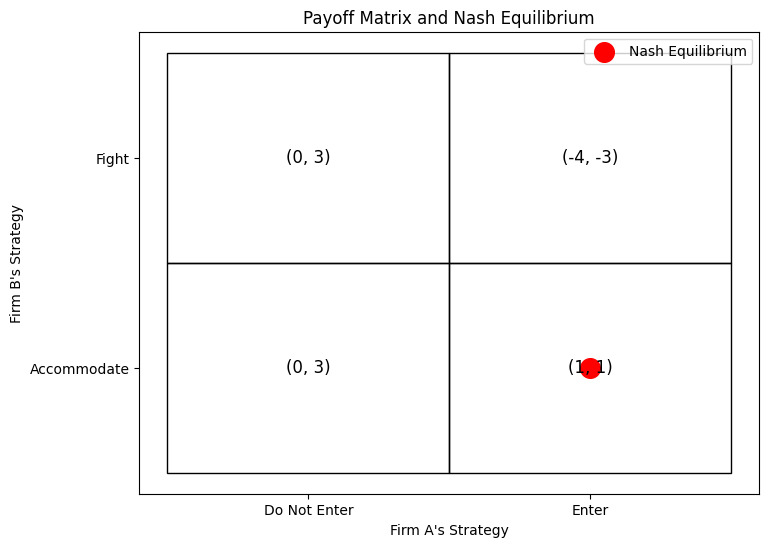

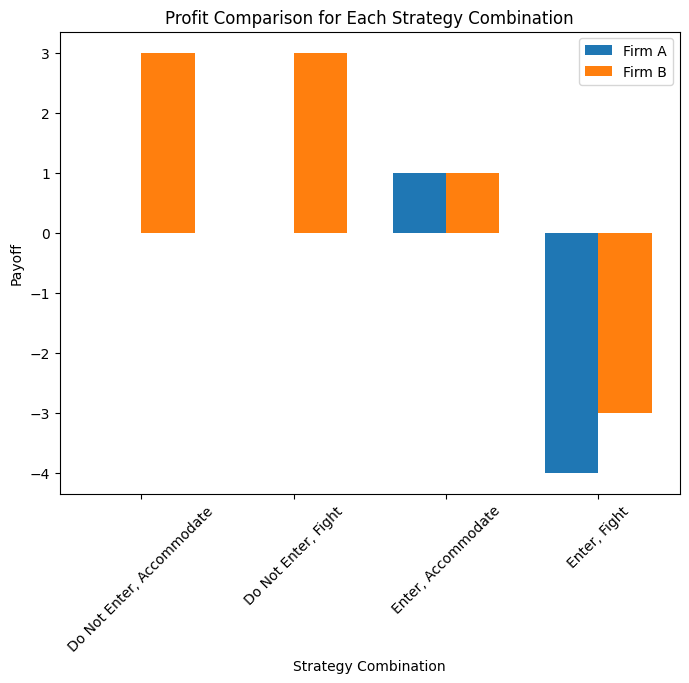

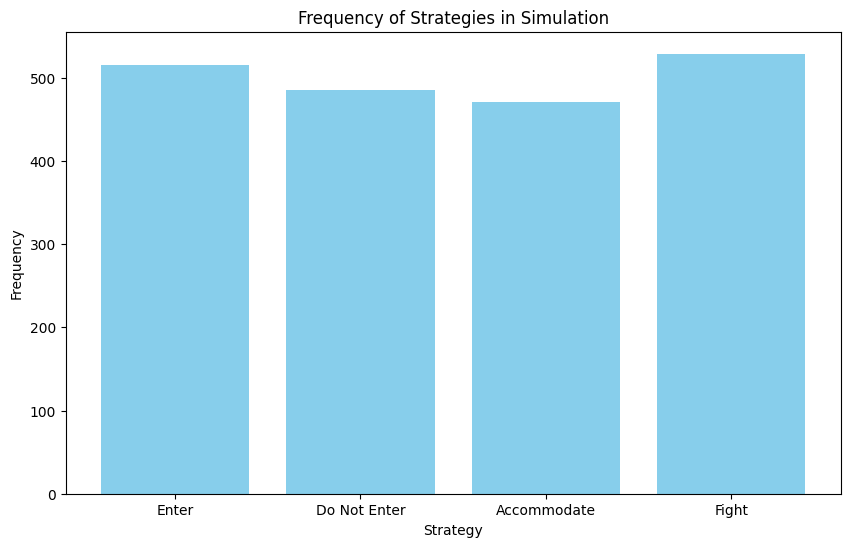

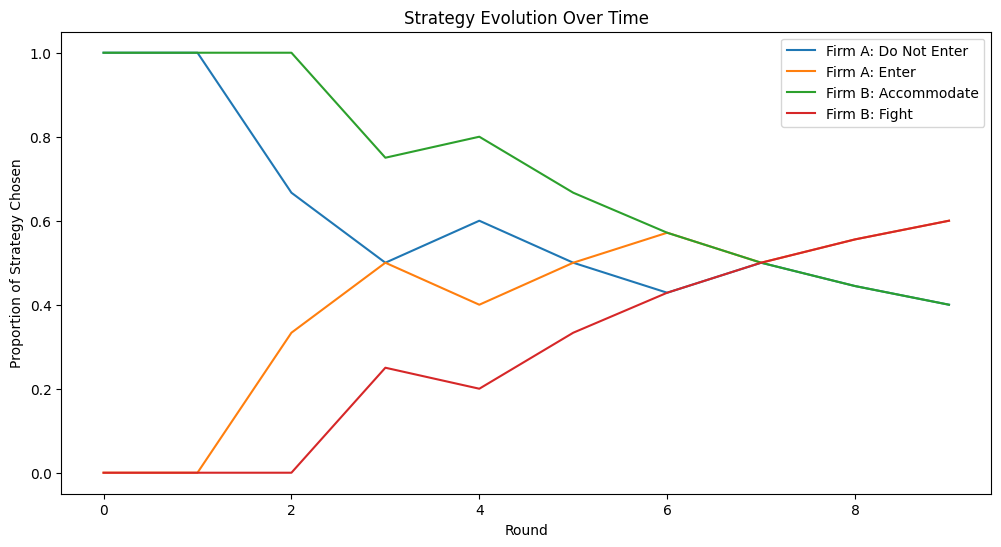

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Player:
    def __init__(self, name, initial_budget):
        self.name = name
        self.budget = initial_budget
        self.price = 0
        self.quantity = 0
        self.profit = 0
        self.profit_history = []
        self.leave_time = None

def payoff_matrix(firm_a_decision, firm_b_strategy):
    if firm_a_decision == "Do Not Enter":
        if firm_b_strategy == "Accommodate" or firm_b_strategy == "Fight":
            return (0, 3)  # Firm A makes ₹0, Firm B makes ₹3
    elif firm_a_decision == "Enter":
        if firm_b_strategy == "Accommodate":
            return (1, 1)  # Both firms make ₹1 each
        elif firm_b_strategy == "Fight":
            return (-4, -3)  # Firm A loses ₹4, Firm B loses ₹3

def run_game_with_payoff_matrix():
    monopolist = Player("Monopolist", 1000)
    entrant = Player("Entrant", 500)

    # Entrant's Entry Decision
    entry_cost = 200
    firm_a_decision = np.random.choice(["Enter", "Do Not Enter"], p=[0.5, 0.5])

    if firm_a_decision == "Enter":
        entrant.budget -= entry_cost  # Deduct entry cost
        firm_b_strategy = np.random.choice(["Accommodate", "Fight"], p=[0.5, 0.5])
    else:
        firm_b_strategy = np.random.choice(["Accommodate", "Fight"], p=[0.5, 0.5])

    # Calculate the payoff based on decisions
    payoff = payoff_matrix(firm_a_decision, firm_b_strategy)
    entrant.profit = payoff[0]
    monopolist.profit = payoff[1]

    # Update budgets
    entrant.budget += entrant.profit
    monopolist.budget += monopolist.profit

    entrant.profit_history.append(entrant.profit)
    monopolist.profit_history.append(monopolist.profit)

    return monopolist, entrant, firm_a_decision, firm_b_strategy

# Simulate multiple games to gather data
num_games = 1000
payoff_counts = {
    ("Do Not Enter", "Accommodate"): 0,
    ("Do Not Enter", "Fight"): 0,
    ("Enter", "Accommodate"): 0,
    ("Enter", "Fight"): 0
}

for _ in range(num_games):
    monopolist, entrant, firm_a_decision, firm_b_strategy = run_game_with_payoff_matrix()
    payoff_counts[(firm_a_decision, firm_b_strategy)] += 1

# Payoff Matrix Visualization
fig, ax = plt.subplots(figsize=(8, 6))

payoffs = {
    ("Do Not Enter", "Accommodate"): (0, 3),
    ("Do Not Enter", "Fight"): (0, 3),
    ("Enter", "Accommodate"): (1, 1),
    ("Enter", "Fight"): (-4, -3)
}

firm_a_strategies = ["Do Not Enter", "Enter"]
firm_b_strategies = ["Accommodate", "Fight"]

for i, firm_a in enumerate(firm_a_strategies):
    for j, firm_b in enumerate(firm_b_strategies):
        payoff = payoffs[(firm_a, firm_b)]
        ax.text(i, j, f"({payoff[0]}, {payoff[1]})", ha='center', va='center', fontsize=12)
        ax.add_patch(plt.Rectangle((i-0.5, j-0.5), 1, 1, fill=False, edgecolor='black'))

# Highlight the Nash equilibrium ("Enter", "Accommodate")
ax.scatter(1, 0, color='red', s=200, label="Nash Equilibrium")

ax.set_xticks([0, 1])
ax.set_xticklabels(firm_a_strategies)
ax.set_yticks([0, 1])
ax.set_yticklabels(firm_b_strategies)
ax.set_xlabel("Firm A's Strategy")
ax.set_ylabel("Firm B's Strategy")
ax.set_title("Payoff Matrix and Nash Equilibrium")
ax.legend()

plt.grid(False)
plt.show()

# Profit Comparison
firm_a_payoffs = [payoffs[(a, b)][0] for a, b in payoff_counts.keys()]
firm_b_payoffs = [payoffs[(a, b)][1] for a, b in payoff_counts.keys()]

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(payoff_counts))

bar1 = ax.bar(index - bar_width / 2, firm_a_payoffs, bar_width, label="Firm A")
bar2 = ax.bar(index + bar_width / 2, firm_b_payoffs, bar_width, label="Firm B")

ax.set_xlabel("Strategy Combination")
ax.set_ylabel("Payoff")
ax.set_title("Profit Comparison for Each Strategy Combination")
ax.set_xticks(index)
ax.set_xticklabels([f"{a}, {b}" for a, b in payoff_counts.keys()], rotation=45)
ax.legend()

plt.show()

# Frequency of Strategies
firm_a_decisions = [a for a, _ in payoff_counts.keys()]
firm_b_strategies = [b for _, b in payoff_counts.keys()]

fig, ax = plt.subplots(figsize=(10, 6))
strategy_counts = {strategy: sum(payoff_counts[(a, b)] for a, b in payoff_counts.keys() if a == strategy) for strategy in set(firm_a_decisions)}
strategy_counts.update({strategy: sum(payoff_counts[(a, b)] for a, b in payoff_counts.keys() if b == strategy) for strategy in set(firm_b_strategies)})

ax.bar(strategy_counts.keys(), strategy_counts.values(), color='skyblue')
ax.set_xlabel("Strategy")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Strategies in Simulation")

plt.show()

# Strategy Evolution Simulation
rounds = 10
firm_a_decisions_over_time = []
firm_b_strategies_over_time = []

for _ in range(rounds):
    monopolist, entrant, firm_a_decision, firm_b_strategy = run_game_with_payoff_matrix()
    firm_a_decisions_over_time.append(firm_a_decision)
    firm_b_strategies_over_time.append(firm_b_strategy)

# Calculate proportions
firm_a_decision_proportions = [firm_a_decisions_over_time.count("Do Not Enter") / rounds,
                               firm_a_decisions_over_time.count("Enter") / rounds]
firm_b_strategy_proportions = [firm_b_strategies_over_time.count("Accommodate") / rounds,
                               firm_b_strategies_over_time.count("Fight") / rounds]

# Plot strategy evolution
plt.figure(figsize=(12, 6))
plt.plot(range(rounds), [firm_a_decisions_over_time[:i+1].count("Do Not Enter") / (i+1) for i in range(rounds)], label="Firm A: Do Not Enter")
plt.plot(range(rounds), [firm_a_decisions_over_time[:i+1].count("Enter") / (i+1) for i in range(rounds)], label="Firm A: Enter")
plt.plot(range(rounds), [firm_b_strategies_over_time[:i+1].count("Accommodate") / (i+1) for i in range(rounds)], label="Firm B: Accommodate")
plt.plot(range(rounds), [firm_b_strategies_over_time[:i+1].count("Fight") / (i+1) for i in range(rounds)], label="Firm B: Fight")
plt.xlabel('Round')
plt.ylabel('Proportion of Strategy Chosen')
plt.title('Strategy Evolution Over Time')
plt.legend()
plt.show()